In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pytz
from textblob import TextBlob
from googletrans import Translator


ModuleNotFoundError: No module named 'textblob'

In [2]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from textblob import TextBlob


In [4]:
import pandas as pd

df = pd.read_csv("C:/google-playstoredata/googleplaystore.csv")  # Use forward slashes or double backslashes
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df = df[df['Type'] == 'Paid']
df['Price'] = df['Price'].str.replace('$', '').astype(float)
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df = df.dropna(subset=['Installs', 'Price', 'Category'])
df['Revenue'] = df['Price'] * df['Installs']


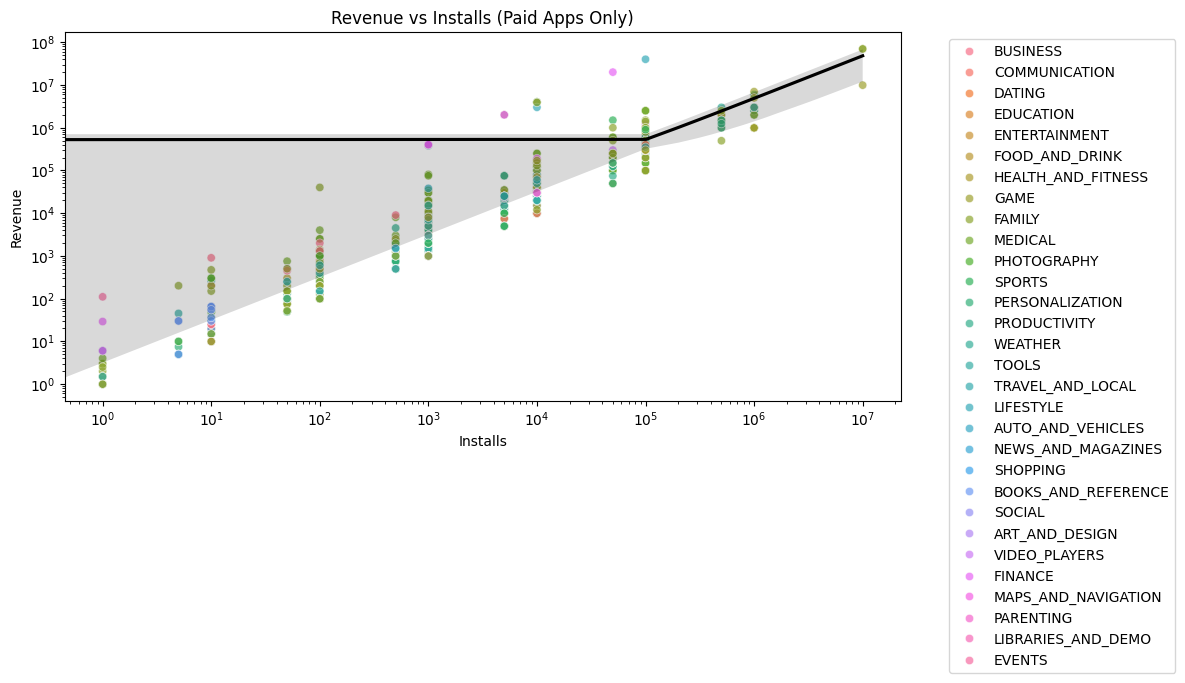

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Installs', y='Revenue', hue='Category', alpha=0.7)
sns.regplot(data=df, x='Installs', y='Revenue', scatter=False, color='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Revenue vs Installs (Paid Apps Only)')
plt.xlabel('Installs')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [7]:
df['Size'] = df['Size'].str.replace('M', '').replace('Varies with device', None)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df_filtered = df[
    (df['Rating'] >= 4.0) &
    (df['Size'] >= 10) &
    (df['Last Updated'].dt.month == 1)
]


In [8]:
now = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
if now.hour >= 15 and now.hour < 17:
    top_categories = df_filtered.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).index
    grouped = df_filtered[df_filtered['Category'].isin(top_categories)].groupby('Category').agg({
        'Rating': 'mean',
        'Reviews': 'sum'
    }).reset_index()

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bar1 = ax.bar(grouped['Category'], grouped['Rating'], width=0.4, label='Avg Rating', align='center')
    bar2 = ax.bar(grouped['Category'], grouped['Reviews']/1e6, width=0.4, label='Reviews (Millions)', align='edge')
    ax.set_ylabel("Value")
    ax.set_title("Top 10 App Categories (3PM–5PM Only)")
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⏱️ This chart is only available between 3PM–5PM IST.")


⏱️ This chart is only available between 3PM–5PM IST.


In [9]:
categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']
df['App'] = df['App'].astype(str)
df['Category'] = df['Category'].astype(str)

# Sentiment subjectivity using TextBlob
df['Subjectivity'] = df['App'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].str.upper().isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False)) &
    (df['Subjectivity'] > 0.5)
]

df_bubble['Size'] = df_bubble['Size'].astype(float)
df_bubble['Installs'] = df_bubble['Installs'].astype(int)
df_bubble = df_bubble[df_bubble['Installs'] > 50000]


TypeError: '>' not supported between instances of 'str' and 'int'

In [10]:
categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']


In [11]:
df['App'] = df['App'].astype(str)
df['Category'] = df['Category'].astype(str)


In [12]:
df['Subjectivity'] = df['App'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [13]:
df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].str.upper().isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False)) &
    (df['Subjectivity'] > 0.5)
]


TypeError: '>' not supported between instances of 'str' and 'int'

In [15]:
from googletrans import Translator
translator = Translator()

def translate_category(cat):
    if cat == 'BEAUTY':
        return translator.translate(cat, dest='hi').text  # Hindi
    elif cat == 'BUSINESS':
        return translator.translate(cat, dest='ta').text  # Tamil
    elif cat == 'DATING':
        return translator.translate(cat, dest='de').text  # German
    else:
        return cat

df_bubble['Translated_Category'] = df_bubble['Category'].apply(translate_category)


ModuleNotFoundError: No module named 'googletrans'

In [16]:
translation_map = {
    'BEAUTY': 'सौंदर्य',        # Hindi
    'BUSINESS': 'வணிகம்',     # Tamil
    'DATING': 'Partnersuche'  # German
}

df_bubble['Translated_Category'] = df_bubble['Category'].apply(
    lambda x: translation_map.get(x, x)
)


NameError: name 'df_bubble' is not defined

In [18]:
categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']

# Drop missing and clean categories
df = df.dropna(subset=['Rating', 'Category', 'Reviews', 'App'])
df['Category'] = df['Category'].str.upper()

# Calculate subjectivity (must have TextBlob installed)
from textblob import TextBlob
df['Subjectivity'] = df['App'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Apply filter
df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False, na=False)) &
    (df['Subjectivity'] > 0.5)
]


TypeError: '>' not supported between instances of 'str' and 'int'

In [19]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [20]:
df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False, na=False)) &
    (df['Subjectivity'] > 0.5)
]


In [21]:
print(df.dtypes)


App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Revenue                  float64
Subjectivity             float64
dtype: object


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import datetime
import pytz


In [23]:
df = pd.read_csv("googleplaystore.csv")  # Replace with correct path if needed
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
# Filter categories
categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']

# Remove rows with missing required values
df = df.dropna(subset=['Rating', 'Category', 'Reviews', 'App', 'Size', 'Installs'])

# Convert types
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Size'] = df['Size'].astype(str).str.replace('M', '')
df = df[df['Size'] != 'Varies with device']
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Clean Category & App columns
df['Category'] = df['Category'].str.upper()
df['App'] = df['App'].astype(str)


In [25]:
df['Subjectivity'] = df['App'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [26]:
df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False, na=False)) &
    (df['Subjectivity'] > 0.5) &
    (df['Installs'] > 50000)
]


In [27]:
translation_map = {
    'BEAUTY': 'सौंदर्य',        # Hindi
    'BUSINESS': 'வணிகம்',     # Tamil
    'DATING': 'Partnersuche'  # German
}

df_bubble['Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))


C:\Users\DelIn\AppData\Local\Temp\ipykernel_18640\4034043989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble['Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))


In [28]:
df_bubble.loc[:, 'Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))


In [29]:
translation_map = {
    'BEAUTY': 'सौंदर्य',  # Hindi
    'BUSINESS': 'வணிகம்',  # Tamil
    'DATING': 'Partnersuche'  # German
}

df_bubble.loc[:, 'Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))


In [30]:
# This you've already done (with .loc[])
df_bubble.loc[:, 'Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))


In [31]:
import datetime
import pytz

now = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))

if 17 <= now.hour < 19:


SyntaxError: incomplete input (2278089380.py, line 6)

In [32]:
if 17 <= now.hour < 19:
    plt.figure(figsize=(12, 6))

    for cat in df_bubble['Translated_Category'].unique():
        subset = df_bubble[df_bubble['Translated_Category'] == cat]
        color = 'pink' if cat.upper() == 'GAME' else None
        plt.scatter(subset['Size'], subset['Rating'],
                    s=subset['Installs'] / 1000,
                    alpha=0.6, label=cat, color=color)

    plt.xlabel("App Size (MB)")
    plt.ylabel("Average Rating")
    plt.title("Bubble Chart – App Size vs Rating (Filtered & Translated)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("⏱️ This chart is only visible between 5 PM and 7 PM IST.")


⏱️ This chart is only visible between 5 PM and 7 PM IST.


In [33]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import datetime
import pytz

# 📂 Load data
df = pd.read_csv("googleplaystore.csv")  # Replace path if needed

# 🧹 Clean & preprocess the data
categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION',
              'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']

# Drop missing values
df = df.dropna(subset=['Rating', 'Category', 'Reviews', 'App', 'Size', 'Installs'])

# Standardize column types
df['Category'] = df['Category'].str.upper()
df['App'] = df['App'].astype(str)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Size'] = df['Size'].astype(str).str.replace('M', '')
df = df[df['Size'] != 'Varies with device']
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# 💬 Add sentiment subjectivity
df['Subjectivity'] = df['App'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# 🧪 Apply all filters
df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False, na=False)) &
    (df['Subjectivity'] > 0.5) &
    (df['Installs'] > 50000)
]

# 🌐 Translate required categories
translation_map = {
    'BEAUTY': 'सौंदर्य',        # Hindi
    'BUSINESS': 'வணிகம்',     # Tamil
    'DATING': 'Partnersuche'  # German
}
df_bubble.loc[:, 'Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))

# 🕐 Time check: Only allow between 5 PM and 7 PM IST
now = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))

if 17 <= now.hour < 19:
    # 📊 Plot the bubble chart
    plt.figure(figsize=(12, 6))

    for cat in df_bubble['Translated_Category'].unique():
        subset = df_bubble[df_bubble['Translated_Category'] == cat]
        color = 'pink' if cat == 'GAME' else None
        plt.scatter(subset['Size'], subset['Rating'],
                    s=subset['Installs'] / 1000,
                    alpha=0.6, label=cat, color=color)

    plt.xlabel("App Size (MB)")
    plt.ylabel("Average Rating")
    plt.title("Bubble Chart – App Size vs Rating (with Install-Based Bubbles)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("⏱️ This chart is only visible between 5 PM and 7 PM IST.")


⏱️ This chart is only visible between 5 PM and 7 PM IST.


C:\Users\DelIn\AppData\Local\Temp\ipykernel_18640\2856256855.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble.loc[:, 'Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))


In [34]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import datetime
import pytz

# 📂 Load data
df = pd.read_csv("googleplaystore.csv")  # Replace path if needed

# 🧹 Clean & preprocess the data
categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION',
              'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']

# Drop missing values
df = df.dropna(subset=['Rating', 'Category', 'Reviews', 'App', 'Size', 'Installs'])

# Standardize column types
df['Category'] = df['Category'].str.upper()
df['App'] = df['App'].astype(str)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Size'] = df['Size'].astype(str).str.replace('M', '')
df = df[df['Size'] != 'Varies with device']
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# 💬 Add sentiment subjectivity
df['Subjectivity'] = df['App'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# 🧪 Apply all filters and make a copy to avoid warnings
df_bubble = df[
    (df['Rating'] > 3.5) &
    (df['Category'].isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('S', case=False, na=False)) &
    (df['Subjectivity'] > 0.5) &
    (df['Installs'] > 50000)
].copy()  # 🔒 This avoids SettingWithCopyWarning

# 🌐 Translate required categories
translation_map = {
    'BEAUTY': 'सौंदर्य',        # Hindi
    'BUSINESS': 'வணிகம்',     # Tamil
    'DATING': 'Partnersuche'  # German
}
df_bubble['Translated_Category'] = df_bubble['Category'].apply(lambda x: translation_map.get(x, x))

# 🕐 Time check: Only allow between 5 PM and 7 PM IST
now = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))

if 17 <= now.hour < 19:
    # 📊 Plot the bubble chart
    plt.figure(figsize=(12, 6))

    for cat in df_bubble['Translated_Category'].unique():
        subset = df_bubble[df_bubble['Translated_Category'] == cat]
        color = 'pink' if cat == 'GAME' else None
        plt.scatter(subset['Size'], subset['Rating'],
                    s=subset['Installs'] / 1000,
                    alpha=0.6, label=cat, color=color)

    plt.xlabel("App Size (MB)")
    plt.ylabel("Average Rating")
    plt.title("Bubble Chart – App Size vs Rating (Filtered & Translated)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("⏱️ This chart is only visible between 5 PM and 7 PM IST.")


⏱️ This chart is only visible between 5 PM and 7 PM IST.
